In [1]:
import pandas as pd 
import seaborn as sns 
import string 
from string import punctuation
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
reviewdf = pd.read_csv('amazon_alexa.csv')
reviewdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [3]:
reviewdf.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
reviewdf.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [5]:
reviewdf = reviewdf.drop(['feedback', ], axis=1)
reviewdf.dropna(inplace=True)

In [6]:
reviewdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3145     True
3146     True
3147     True
3148     True
3149     True
Length: 3150, dtype: bool

In [7]:
reviewdf.drop_duplicates(inplace=True)
reviewdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2796    False
2797    False
2798    False
2799    False
2800    False
Length: 2435, dtype: bool

In [8]:
reviewdf['word_count'] = reviewdf['verified_reviews'].apply(lambda x: len(str(x).split()))

reviewdf['word_count'].iplot(
    kind='hist',
    bins=70,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

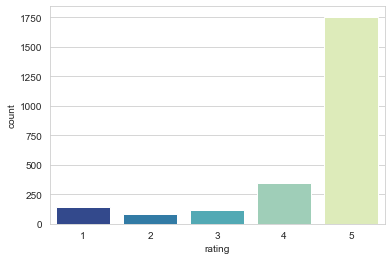

In [9]:
sns.set_style('whitegrid') 
sns.countplot(x='rating',data=reviewdf, palette='YlGnBu_r')
display()

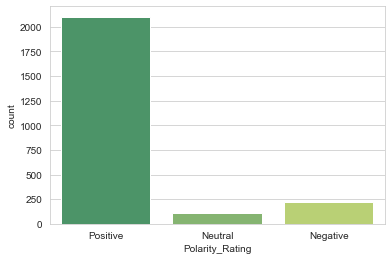

In [10]:
reviewdf['Polarity_Rating'] = reviewdf['rating'].apply(lambda x: 'Positive' if x > 3 
else('Neutral' if x == 3 else 'Negative'))
%matplotlib inline
sns.set_style('whitegrid') 
sns.countplot(x='Polarity_Rating',data=reviewdf, palette='summer')
display()

In [11]:
Positive_df = reviewdf[reviewdf['Polarity_Rating'] == 'Positive'][0:8000]
Neutral_df = reviewdf[reviewdf['Polarity_Rating'] == 'Neutral'] [0:8000]
Negative_df = reviewdf[reviewdf['Polarity_Rating'] == 'Negative'] [0:8000]
reviewdf = pd.concat([Positive_df, Neutral_df, Negative_df], axis=0)

Negative_df

,rating,date,variation,verified_reviews,word_count,Polarity_Rating
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",32,Negative
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,12,Negative
141,1,30-Jul-18,Charcoal Fabric,Not much features.,3,Negative
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",14,Negative
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,3,Negative
...,...,...,...,...,...,...
2696,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,22,Negative
2697,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,7,Negative
2716,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,42,Negative
2740,1,30-Jul-18,Black Dot,I didn’t order it,4,Negative


In [12]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation] 
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [13]:
reviewdf['reviews'] = reviewdf['verified_reviews'].apply(get_text_processing) 
reviewdf.head()

,rating,date,variation,verified_reviews,word_count,Polarity_Rating,reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,3,Positive,Love Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,2,Positive,Loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",38,Positive,Sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,34,Positive,lot fun thing 4 yr old learns dinosaurs contro...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Positive,Music


In [14]:
#lexicon-based sentiment analysis
from afinn import Afinn
import pandas as pd

#instantiate afinn
afn = Afinn()

#creating list sentences
news_df = reviewdf['verified_reviews']

# compute scores (polarity) and labels
scores = [afn.score(article) for article in news_df] 
sentiment = ['positive' if score > 0
                else 'negative' if score < 0
                    else 'neutral'
                for score in scores]

sentimentdf = pd.DataFrame()
sentimentdf['topic'] = news_df
sentimentdf['scores'] = scores
sentimentdf['sentiments'] = sentiment
print(sentimentdf)

                                                  topic  scores sentiments
0                                         Love my Echo!     3.0   positive
1                                             Loved it!     3.0   positive
2     Sometimes while playing a game, you can answer...     0.0    neutral
3     I have had a lot of fun with this thing. My 4 ...     9.0   positive
4                                                 Music     0.0    neutral
...                                                 ...     ...        ...
2696  Echo Dot responds to us when we aren't even ta...     2.0   positive
2697              NOT CONNECTED TO MY PHONE PLAYLIST :(     0.0    neutral
2716  The only negative we have on this product is t...     5.0   positive
2740                                  I didn’t order it     0.0    neutral
2745  The product sounded the same as the emoji spea...     3.0   positive

[2435 rows x 3 columns]


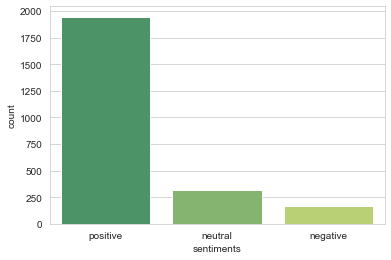

In [15]:
tx = sns.countplot(x='sentiments',data=sentimentdf, palette='summer')
display()

In [16]:
reviewdf=pd.concat([reviewdf,sentimentdf.scores,sentimentdf.sentiments], axis='columns')
reviewdf.head()

,rating,date,variation,verified_reviews,word_count,Polarity_Rating,reviews,scores,sentiments
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,3,Positive,Love Echo,3.0,positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,2,Positive,Loved,3.0,positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",38,Positive,Sometimes playing game answer question correct...,0.0,neutral
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,34,Positive,lot fun thing 4 yr old learns dinosaurs contro...,9.0,positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,Positive,Music,0.0,neutral


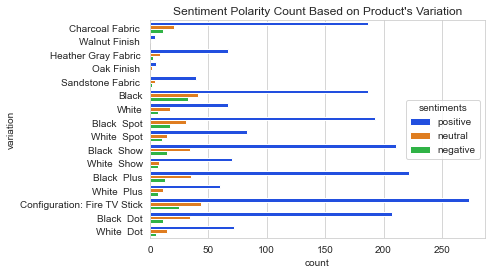

In [18]:
variationplt = sns.countplot(data=reviewdf, y='variation', hue='sentiments', palette='bright')
sns.set(rc={'figure.figsize':(12,10)})
variationplt.set(title = "Sentiment Polarity Count Based on Product's Variation")
display()

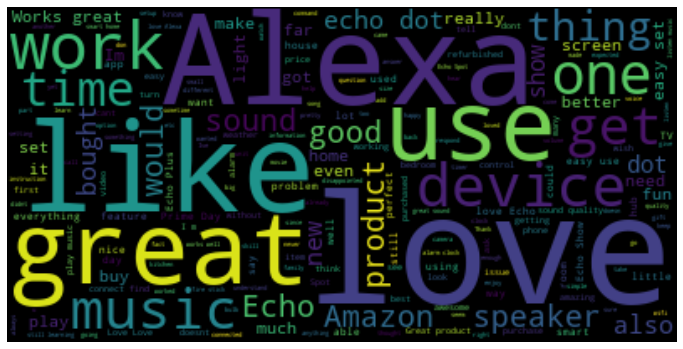

In [19]:
#Overall WorldCloud
stopwords = set('stopwords')
stopwords.update(["br", "href"])
textt = " ".join(review for review in reviewdf.reviews)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [20]:
cloud_df = reviewdf[reviewdf['scores'] != 0]
cloud_df['sen_score'] = reviewdf['scores'].apply(lambda rating : +1 if rating > 0 else -1)

positive = cloud_df[cloud_df['sen_score'] == 1]
negative = cloud_df[cloud_df['sen_score'] ==-1]

cloud_df.tail()

,rating,date,variation,verified_reviews,word_count,Polarity_Rating,reviews,scores,sentiments,sen_score
2673,1,30-Jul-18,Black Dot,I was really happy with my original echo so i ...,126,Negative,really happy original echo thought Id get echo...,9.0,positive,1
2688,2,30-Jul-18,Black Dot,Weak sound. Compared to the Google Home Mini t...,59,Negative,Weak sound Compared Google Home Mini sound bad...,-7.0,negative,-1
2696,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,22,Negative,Echo Dot responds us arent even talking Ive un...,2.0,positive,1
2716,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,42,Negative,negative product terrible sound quality massiv...,5.0,positive,1
2745,1,30-Jul-18,White Dot,The product sounded the same as the emoji spea...,42,Negative,product sounded emoji speaker five sister even...,3.0,positive,1


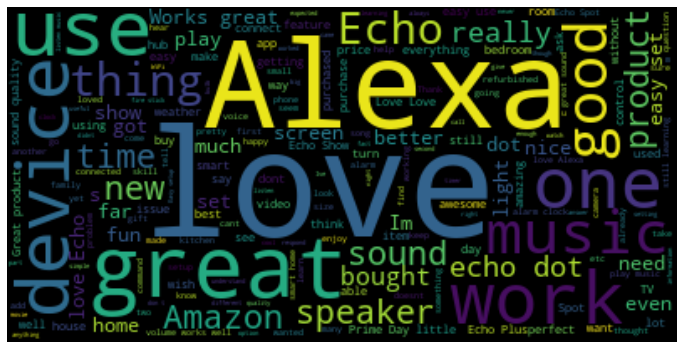

In [21]:
#Positive Sentiments Wordcloud
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

pos = " ".join(review for review in positive.reviews)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
                  
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

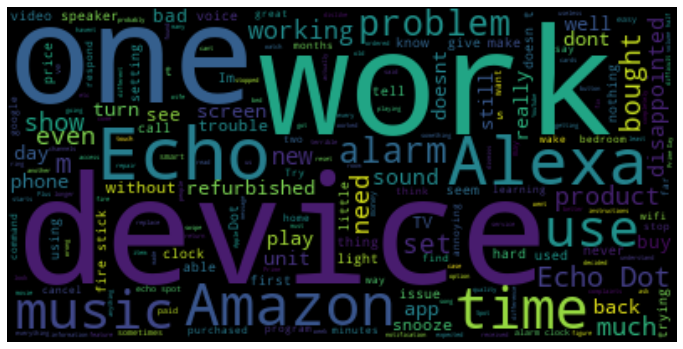

In [22]:
#Negative Sentiments Wordcloud
neg = " ".join(review for review in negative.reviews)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()